# Notebook pour un trace simple: age-depth a Little Dome C
## En utilisant les sorties 2D numpy


## imports modules

In [1]:
from matplotlib import pyplot as plt

%matplotlib qt
%matplotlib notebook

#matplotlib inline # To display plot outputs inside the notebook itself (and not in the separate viewer)
#%matplotlib auto
import numpy as np

import pandas as pd
import scipy as sp

# import data 

In [2]:
# fichiers variables calculees

dir_fred = '../LDC_Delores_nov_2019/'
radar_line = 'BV38B-E_proc2/'

# names of 2D files creadte by isoinv in the radar_line directory
age_fl = 'age.txt'
distance_fl = 'distance.txt'
depth_fl = 'depth.txt'
thinning_fl ='thinning.txt'
resolution_fl ='ages_density.txt'
   

### import ages model, distance, depth, thinning, resolution

In [3]:
file_age = dir_fred + radar_line + age_fl
file_dist = dir_fred + radar_line + distance_fl
file_depth = dir_fred + radar_line + depth_fl
file_thin = dir_fred + radar_line + thinning_fl
file_reso = dir_fred + radar_line + resolution_fl



age = np.loadtxt(file_age)
dist = np.loadtxt(file_dist)
depth = np.loadtxt(file_depth)
thin = np.loadtxt(file_thin)
reso = np.loadtxt(file_reso)


### Import Isochrones observed

In [4]:
# lecture des ages iso

ages_iso_obs = 'ages.txt' # contient les ages des isochrones

file_iso_ages = dir_fred + ages_iso_obs 
df_ages = pd.read_csv(file_iso_ages,header=0,delim_whitespace=True)

# la premiere ligne a des noms de colonne avec espaces et parenthese que pandas ne comprend pas
# contournement. Juste pour montrer comment on appelle les colonnes avec pandas.

df_ages = df_ages.iloc[:,0:3]
df_ages.columns =  ['age','sigma_age','sigma_accu']
ages_iso = pd.DataFrame(df_ages,columns=['age']).values / 1000. 

#on aurait pu se contenter de 
ages_iso = df_ages.iloc[:,0].values /1000.   # .values transforme la DataFrame en array numpy
#ages_iso

# lecture des ages interpoles sur le pas du modèle

iso_obs = 'iso_obs_interp.txt'
file_iso = dir_fred + radar_line + iso_obs
depth_iso = np.loadtxt(file_iso)

### Fonctions extraction colonnes et plot

In [5]:
# age
def plot_age_vertical(distance,index_col,dist,age,depth,ages_iso,depth_iso):

    ## select a distance, find the corresponding index and extract the vertical profile data
    epsilon = 0.01   # pour le test 
    result = np.where(abs(distance - dist[0,:]) < epsilon)
    index = (result[0])                # index de la distance
    distlabel = str(distance) + 'km'
    
    age_col = age[:,index]             # age calculé
    depth_col = depth[:,index]         # profondeur des ages calcules
    z_iso = depth_iso[:,index]  # pour les marqueurs iso observes, interpoles sur grille modele
    
    plt.plot(age_col,depth_col,color=line_col[index_col],zorder = 2,label=distlabel)  # see line 2D properties in tutorial
    plt.scatter(ages_iso, z_iso,color=line_col[index_col],zorder = 4, s=4)
    plt.legend(loc=1)
    
    return


In [6]:
# thinning
def plot_thinning_vertical(distance,index_col,dist,thin,depth):

    ## select a distance, find the corresponding index and extract the vertical profile data
    epsilon = 0.01   # pour le test 
    result = np.where(abs(distance - dist[0,:]) < epsilon)
    index = (result[0])                # index de la distance
    distlabel = str(distance) + 'km'
    
    thin_col = thin[:,index]             # age calculé
    depth_col = depth[:,index]         # profondeur des ages calcules
   
    
    plt.plot(thin_col,depth_col,color=line_col[index_col],zorder = 2,label=distlabel)  # see line 2D properties in tutorial
    
    plt.legend(loc=2)
    
    return


In [7]:
# resolution
def plot_reso_vertical(distance,index_col,dist,reso,depth):

    ## select a distance, find the corresponding index and extract the vertical profile data
    epsilon = 0.01   # pour le test 
    result = np.where(abs(distance - dist[0,:]) < epsilon)
    index = (result[0])                # index de la distance
    distlabel = str(distance) + 'km'
    
    reso_col = reso[:,index]/1000.          # resolution calculée
    depth_col = depth[:,index]              # profondeur des ages calcules
    step = depth[2,index] - depth[1,index]  # pas vertical 
    print (step)
    depth_col2 = depth[1:, index] - step    # correction pour tenir compte du fait que reso est obtenu par difference
                                            # et a un noeud de moins
   
    #print (reso_col)
    
    plt.plot(reso_col,depth_col2,color=line_col[index_col],zorder = 2,label=distlabel)  # see line 2D properties in tutorial
    
    plt.legend(loc=1)
    
    return


## PLOT

### Figure 1 ages

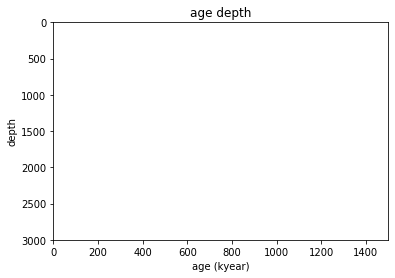

In [8]:
fig, axes = plt.subplots()

# taille figure
#figure = plt.figure(figsize = (15, 10)) 

# pour avoir une figure un peu interactive
#%matplotlib notebook    

#Set labels for x and y axes as well as the plot title
plt.xlabel("age (kyear)")
plt.ylabel("depth")
plt.title("age depth")

# type de ligne
line_col = ['b','g','cyan','orange']

# axe depth inverse
plt.ylim(3000,0)
plt.xlim(0,1500)

# color of the line
index_col = 0

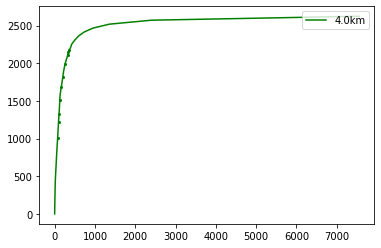

In [9]:
# pour une verticale
# parametres: distance (en km), index_col, age, depth , ages_iso, depth_iso
plot_age_vertical(4.,1,dist,age,depth,ages_iso,depth_iso)

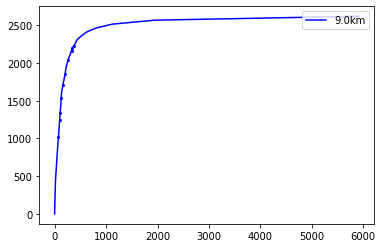

In [10]:
# pour une verticale
# parametres: distance (en km), index_col, age, depth , ages_iso, depth_iso
plot_age_vertical(9.,0,dist,age,depth,ages_iso,depth_iso)

### Figure 2 thinning

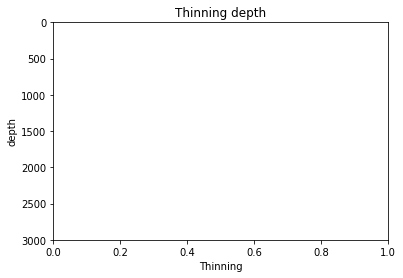

In [11]:
fig, axes = plt.subplots()

# taille figure
#figure = plt.figure(figsize = (15, 10)) 

# pour avoir une figure un peu interactive
#%matplotlib notebook    

#Set labels for x and y axes as well as the plot title
plt.xlabel("Thinning")
plt.ylabel("depth")
plt.title("Thinning depth")

# type de ligne
line_col = ['b','g','cyan','orange']

# axe depth inverse
plt.ylim(3000,0)
plt.xlim(0,1)

# color of the line
index_col = 0

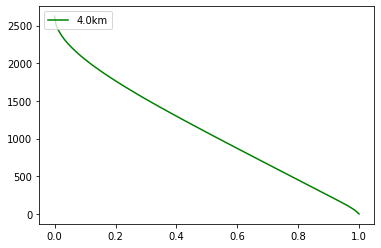

In [12]:
# pour une verticale
# parametres: distance (en km), index_col, thin, depth
plot_thinning_vertical(4.,1,dist,thin,depth)

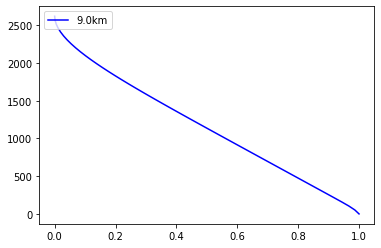

In [13]:
# pour une verticale
# parametres: distance (en km), index_col, thin, depth
plot_thinning_vertical(9.,0,dist,thin,depth)

### Figure 3 resolution

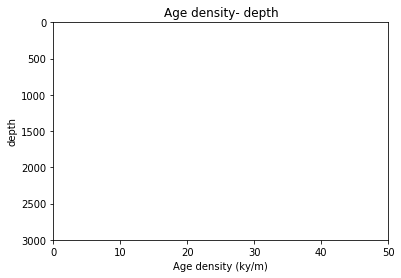

In [14]:
fig, axes = plt.subplots()

# taille figure
#figure = plt.figure(figsize = (15, 10)) 

# pour avoir une figure un peu interactive
#%matplotlib notebook    

#Set labels for x and y axes as well as the plot title
plt.xlabel("Age density (ky/m)")
plt.ylabel("depth")
plt.title("Age density- depth")

# type de ligne
line_col = ['b','g','cyan','orange']

# axe depth inverse
plt.ylim(3000,0)
plt.xlim(0,50)

# color of the line
index_col = 0

[52.47229616]


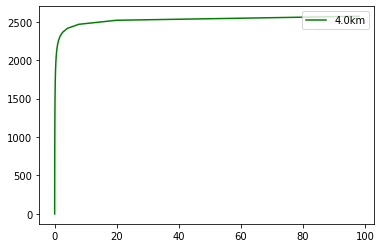

In [15]:
# pour une verticale
# parametres: distance (en km), index_col, reso, depth
plot_reso_vertical(4.,1,dist,reso,depth)

[52.3719135]


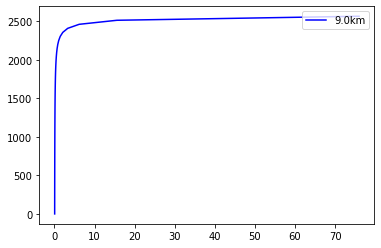

In [16]:
# pour une verticale
# parametres: distance (en km), index_col, reso, depth
plot_reso_vertical(9.,0,dist,reso,depth)